In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [15]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

# here, we have 5 i/p columns in this data.

In [16]:
df = pd.DataFrame(X, columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

# here we create one o/p column('target').Now,(total=6) columns.

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.382207,2.912598,0.064406,-0.783308,1.749062,0
1,1.000810,-0.925622,-0.917869,1.129338,0.341997,1
2,3.132854,-1.157504,-3.443463,2.723641,-4.690275,0
3,1.314003,0.394554,-0.169354,0.881458,-2.116511,0
4,1.267134,-0.205946,-0.077182,-0.103154,0.509652,1


In [17]:
# So now, we are going to construct 'BaggingClassifier' and usme hm phle se hi bta rh hai ki hme 'column_sampling' krna hai.
# and, we have to select 2 columns (from 5 columns) randomly.

bag = BaggingClassifier(max_features=2)  

# means hmare tree me ab yhi 2 columns baar-baar dikhai denge.   

In [18]:
# fit the model 

bag.fit(df.iloc[:,:5],df.iloc[:,-1])

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,2
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


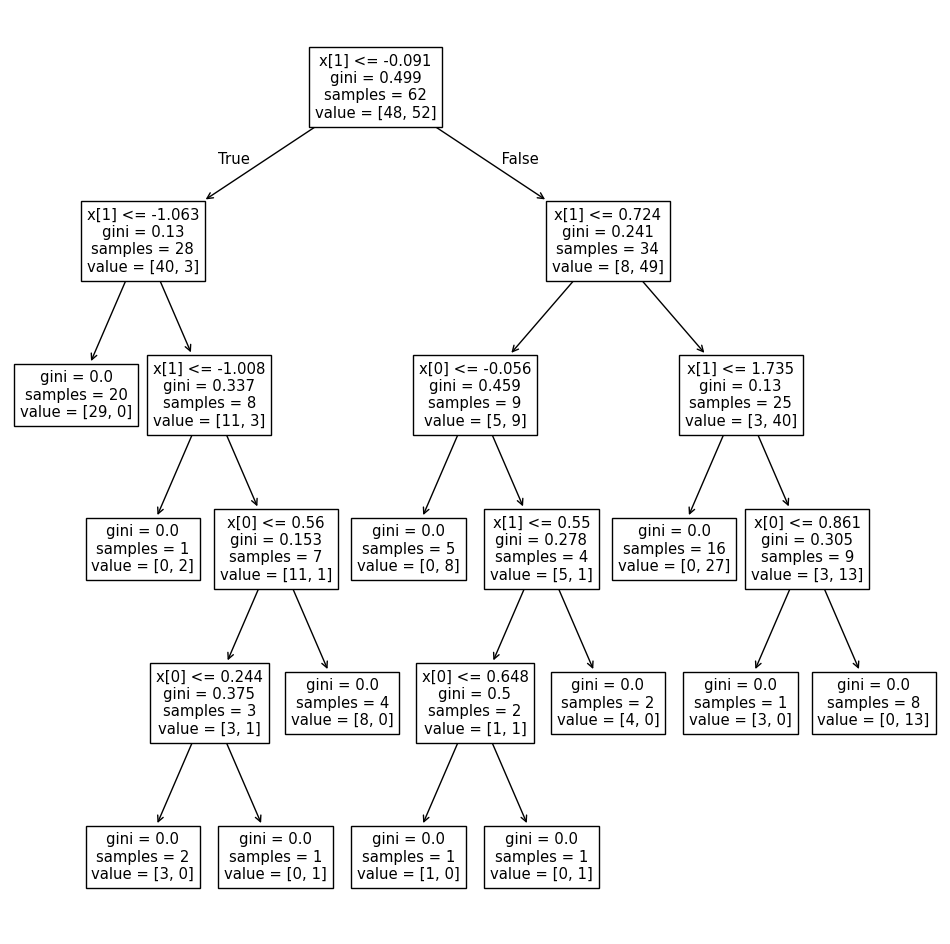

In [19]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [20]:
# so,we see that ki pure ke pure D.T mein,kisi bhi node mein,jo splitting ho rha hai,wo ya to (0/1) pe hi ho rha hai.
# iske alawa aur koi column touch nhi hua hai.
# This proves that,Bagging in D.T 'is tree level' -> means tree bnne ke phle hi finalize ho gya ki jo tree bnega wo yhi 2 column se bnega. 

In [21]:
# Now, let's do the same thing for 'Random-Forest-Classifier' :-

rf = RandomForestClassifier(max_features=2)   # here also we give only 2 columns for this.

In [22]:
rf.fit(df.iloc[:,:5], df.iloc[:,-1])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


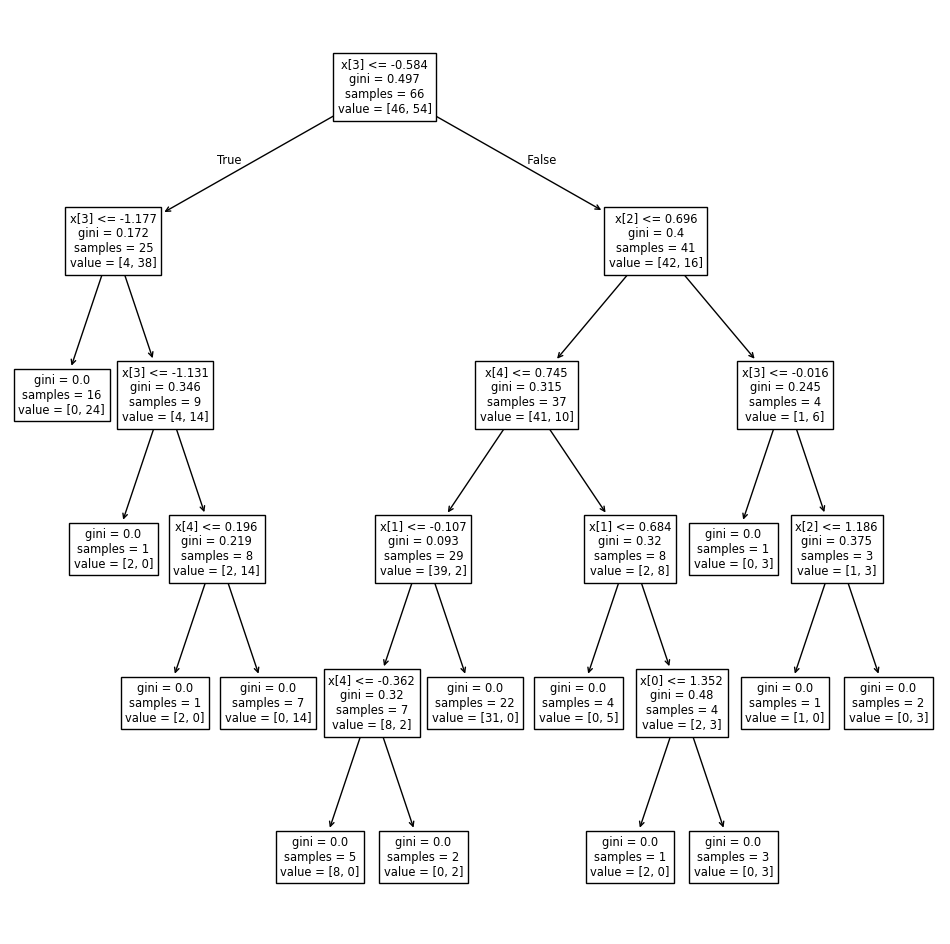

In [23]:
# plot the models 

plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

In [24]:
# in this,there is 'node-level' splitting happens.
# so,when 1st node formed,then we 1st decide that ki konse 2 columns ke upr hm yeh node form krenge.
# And, we do 'node_level_sampling' at each node, before creating it.
# jiski wjh se hmare R.F ka 'randomness' thoda jyada hai,and b/c of randomness is high, model will perform better.  

In [25]:
# And,we also known that ki if (Accuracy > 50%) ho and randomness bht jyda ho -> to hmara 'Ensemble_Learning' bht accha perform krta hai. 

<h2> Summary :- </h2>

In [26]:
# In 'Bagging' -> column Sampling is "tree-level" whereas in 'R.F' -> column Sampling is like "node-level".